In [9]:
import time
import keras
import math
import subprocess
import pickle
import pandas as pd
import urllib.parse as urlenc
from collections import Counter
import tensorflow
from tensorflow.keras import layers
from pandas import DataFrame
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer

to show dataset

In [10]:
dataa= pd.read_csv('sentiment task - Sheet1.csv')
dataa.head()


,Text,label
0,راىع,Positive
1,روعه,Positive
2,جمييل,Positive
3,حلمي💔,Neutral
4,احبكم,Positive


to know number of classes in dataset

In [11]:
print(dataa['label'])

0       Positive
1       Positive
2       Positive
3        Neutral
4       Positive
          ...   
1515       Mixed
1516    Negative
1517    Negative
1518       Mixed
1519         NaN
Name: label, Length: 1520, dtype: object


In [12]:
for i in dataa['label']:
  print(i)

Positive
Positive
Positive
Neutral
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Neutral
Positive
Positive
Positive
Positive
Neutral
Neutral
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Neutral
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Neutral
Positive
Neutral
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Neutral
Positive
Positive
Mixed
Positive
Positive
Positive
Positive
Positive
Pos

In [13]:
classes = dataa['label'].unique()
print("classes inside data:",dataa['label'].nunique())
print("Class names:", classes)


classes inside data: 4
Class names: ['Positive' 'Neutral' 'Negative' 'Mixed' nan]


In [14]:
class_counts = dataa['label'].value_counts()

print(class_counts)

label
Negative    601
Neutral     545
Positive    351
Mixed        22
Name: count, dtype: int64


In [15]:
dataa = dataa.dropna(subset=['label'])
#print(df_cleaned)
for i in dataa['label']:
  print(i)

Positive
Positive
Positive
Neutral
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Neutral
Positive
Positive
Positive
Positive
Neutral
Neutral
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Neutral
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Neutral
Positive
Neutral
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Neutral
Positive
Positive
Mixed
Positive
Positive
Positive
Positive
Positive
Pos

In [16]:
def counter_word(text_col):
    pure_num = 0
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
            pure_num += 1
    return count,pure_num

this code that calculate count of every word in column instead of it took with number of frequencies it take it once to get number of uniqe word
note that number of all words =28206 and number after uniqe =8915

In [17]:
counter,pure_num = counter_word(dataa.Text)
num_unique_words = len(counter)
print(len(counter))
print(counter)
#print(num_unique_words)
print(pure_num)



8905
Counter({'من': 661, 'في': 463, 'ارين': 223, 'على': 216, 'الله': 191, 'يتم': 190, 'عليكم': 180, '.': 169, 'السلام': 152, 'ما': 141, '#حاضر_وموجود': 139, 'ولا': 136, 'مع': 120, 'حيث': 118, 'العود': 115, 'انتقاء': 114, 'لتغير': 114, 'مستخرج': 111, 'و': 110, 'عود': 109, 'يارب': 107, 'لي': 106, '؟': 101, 'كل': 99, 'لا': 97, 'المكان': 96, 'تم': 95, 'هل': 95, 'بنك': 92, '..': 89, 'اندونيسيا': 86, 'عن': 85, 'دوله': 84, 'بعنايه': 84, 'رائحه': 84, 'انا': 83, 'جزيره': 83, 'بس': 74, 'عندي': 73, 'الراجحي': 69, 'والله': 67, 'غير': 67, '،': 67, '،،': 67, 'البنك': 66, 'رقم': 64, 'كيف': 64, 'تاريخ': 61, 'يوم': 60, 'وش': 60, 'الان': 60, 'طريق': 59, 'ان': 58, 'لم': 58, 'المبلغ': 58, 'رسوم': 56, 'الى': 55, 'فيه': 55, 'بعد': 54, 'ياليت': 53, '-': 53, 'بطاقة': 52, 'شي': 52, 'طلب': 52, 'هذا': 51, 'او': 50, 'ولم': 50, 'وانا': 49, 'رد': 49, 'الي': 49, 'الف': 48, 'لو': 47, 'لكن': 44, 'الطلب': 44, 'اللي': 43, 'ريال': 43, 'حتى': 43, 'علي': 43, 'مبلغ': 42, 'قبل': 42, 'اي': 41, 'لكم': 41, 'التطبيق': 40, 'عشان'

In [18]:
train_dataa = dataa

train_sentences = train_dataa.Text.to_numpy()

tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_sentences)
#convert words into integer
train_sequences = tokenizer.texts_to_sequences(train_sentences)
max_length = 20
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")

vectorizer = CountVectorizer(tokenizer = lambda x: x.split(","))

train_labels = vectorizer.fit_transform(dataa.label.to_numpy()).toarray()


print(vectorizer.vocabulary_)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_padded, train_labels, test_size=0.20, shuffle=True)

{'positive': 3, 'neutral': 2, 'negative': 1, 'mixed': 0}


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [19]:
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold

import keras;
from keras.models import Sequential;
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation, Bidirectional, Embedding, LSTM;
max_length=20
num_unique_words=8905
model = keras.models.Sequential()
model.add(Embedding(num_unique_words, 16, input_length=max_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(4))
model.add(Activation('softmax'));
loss = keras.losses.CategoricalCrossentropy()
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

kf = KFold(n_splits = 5, shuffle=True)
val = 0
cvscores = []
#start = time.time()

for train_index, val_index in kf.split(X_train,y_train):
  print(f"""
  #   ==============
  #   Val num : {val + 1}
  #   ==============
  #   """)
  history = model.fit(X_train[train_index], y_train[train_index], validation_data=(X_train[val_index], y_train[val_index]), epochs=2, verbose=1)
  scores = model.evaluate(X_test, y_test, verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
  val += 1

##end = time.time()
#print(f"\n\n The Training Duration Time for pkdd in Bi-LSTM is: {end - start}\n\n ")
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



  #   ==============
  #   Val num : 1
  #   ==============
  #   
Epoch 1/2
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.3615 - loss: 1.3052 - val_accuracy: 0.4198 - val_loss: 1.1483
Epoch 2/2
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4848 - loss: 1.0670 - val_accuracy: 0.4650 - val_loss: 1.0517
compile_metrics: 53.29%

  #   ==============
  #   Val num : 2
  #   ==============
  #   
Epoch 1/2
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5547 - loss: 0.9926 - val_accuracy: 0.6296 - val_loss: 0.8984
Epoch 2/2
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6688 - loss: 0.8005 - val_accuracy: 0.7119 - val_loss: 0.6771
compile_metrics: 62.17%

  #   ==============
  #   Val num : 3
  #   ==============
  #   
Epoch 1/2
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8002 - loss: 0.5403 - val_accuracy: 0.8230 - val_loss: 0.4908
Epoch 2/2
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9100 - loss: 0.3194 - val_accuracy: 0.8189 - val_loss:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 20, 16)              │         142,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          41,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │             516 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 553,406 (2.11 MB)

 Trainable params: 184,468 (720.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 368,938 (1.41 MB)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         6
           1     0.6899    0.7542    0.7206       118
           2     0.5727    0.5625    0.5676       112
           3     0.6923    0.6618    0.6767        68

    accuracy                         0.6480       304
   macro avg     0.4887    0.4946    0.4912       304
weighted avg     0.6337    0.6480    0.6402       304

Confusion Matrix



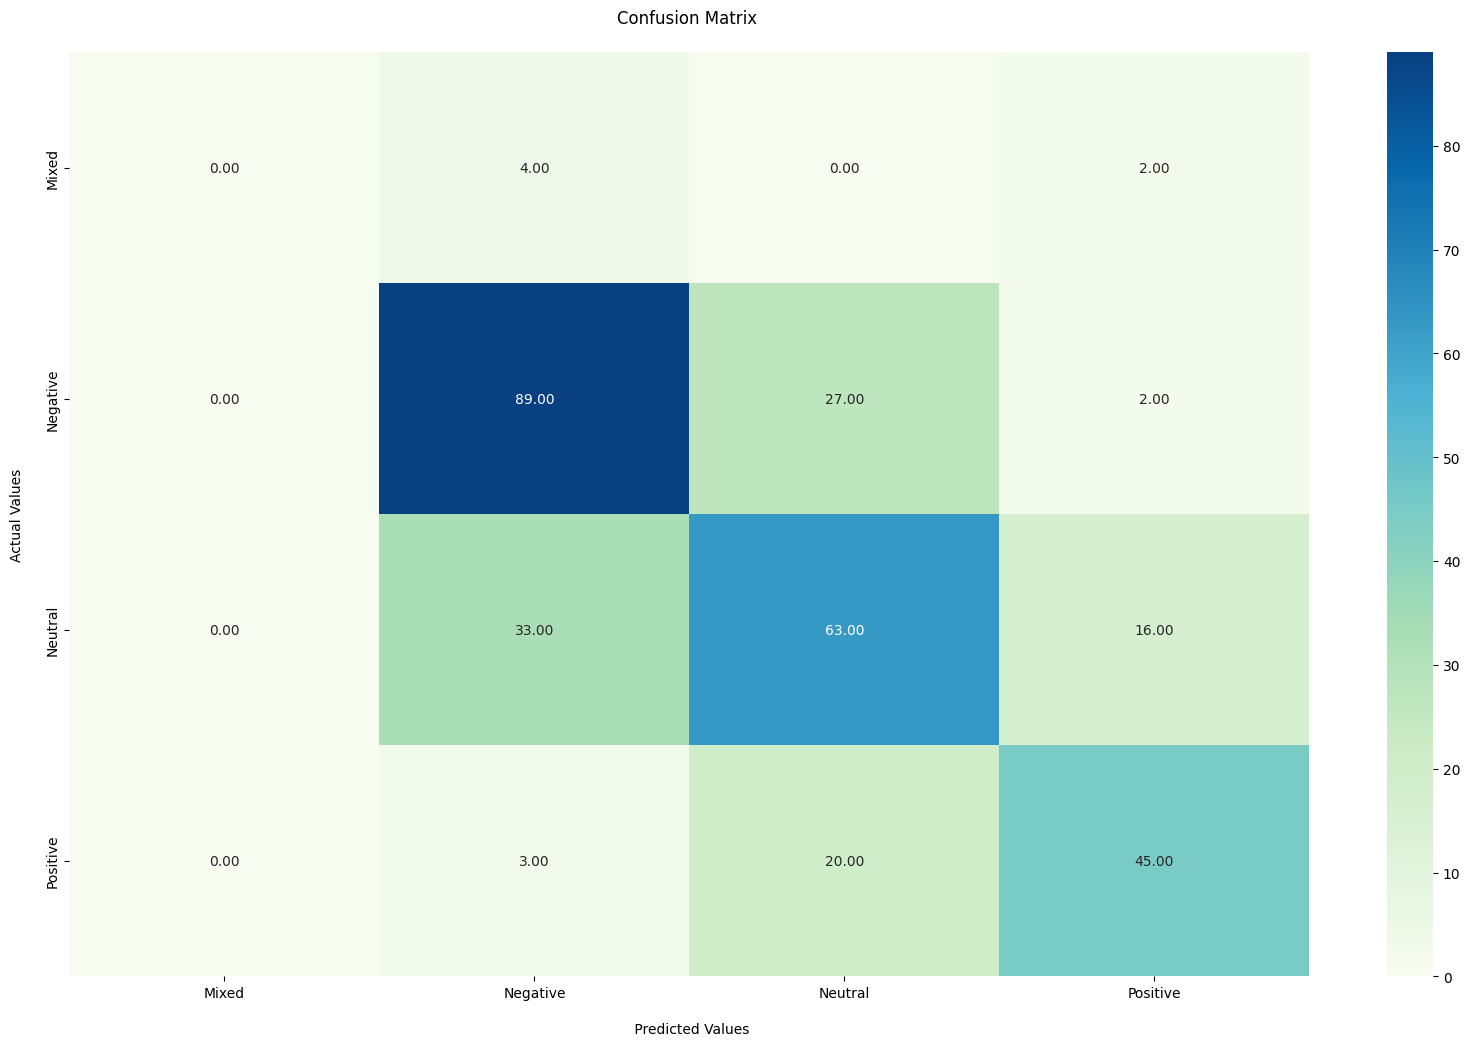

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predection Object
predictions = model.predict(X_test)

# Classefication Output
print(classification_report(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), digits=4))

# The Matrix
print('Confusion Matrix\n')
plt.figure(figsize=(20,12))
fx=sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1)), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');


fx.xaxis.set_ticklabels(['Mixed','Negative','Neutral','Positive'])
fx.yaxis.set_ticklabels(['Mixed','Negative','Neutral','Positive'])

# Show Image
plt.show()


In [21]:
import pickle

# Save to file in the current working directory
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)



In [26]:
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
predictions

array([[2.5291193e-02, 9.3754649e-01, 3.2899272e-02, 4.2630197e-03],
       [1.0629056e-02, 9.8705232e-01, 2.2723994e-03, 4.6098110e-05],
       [4.0153752e-04, 8.5255299e-03, 9.6557230e-01, 2.5500555e-02],
       ...,
       [9.0952935e-03, 8.9069390e-01, 9.9714890e-02, 4.9582165e-04],
       [1.7446418e-04, 1.2586675e-02, 9.8530823e-01, 1.9306591e-03],
       [2.2389926e-03, 2.4945699e-03, 2.0156847e-02, 9.7510946e-01]],
      dtype=float32)